In [30]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# reads the data from the file

df = pd.read_csv('/Users/kaidenjones/Desktop/localify_lab4_data.tsv', sep='\t')
# df = pd.read_csv('/Users/cymoar/COMP-ML/Labs/ML-Lab4/localify_music_genre-song_dataset_short_limited.tsv', sep='\t')

# Slpits the data into training and validation data
df_training = df.iloc[:8000]
df_validation = df.iloc[8000:]

# spit the data into labels, X, y
training_label_df = df_training[['song_name','artist_name']]
tensor_label = tf.convert_to_tensor(training_label_df)
training_X_df = df_training[['acousticness','danceability','energy','instrumentalness',
                             'liveness','loudness','speechiness','tempo','valence']]
tensor_training_X = tf.convert_to_tensor(training_X_df)
training_y_df = df_training[['genre_name','Unnamed: 12']]

# tensor_training_y1 = tf.convert_to_tensor(training_y_df[['genre_name']])
tensor_training_y = tf.convert_to_tensor(training_y_df[['Unnamed: 12']], dtype=tf.float32)
tty2 = tf.convert_to_tensor(training_y_df[['Unnamed: 12']])
vector_y = tf.reshape(tty2, [8000])

validation_label_df = df_validation[['song_name','artist_name']]
validation_X_df = df_validation[['acousticness','danceability','energy','instrumentalness','liveness',
                                 'loudness','speechiness','tempo','valence']]
validation_y_df = df_validation[['genre_name','Unnamed: 12']]

tensor_validation_X = tf.convert_to_tensor(validation_X_df)
training_y_df = df_training[['genre_name','Unnamed: 12']]

# tensor_training_y1 = tf.convert_to_tensor(training_y_df[['genre_name']])
tensor_validation_y = tf.convert_to_tensor(validation_y_df[['Unnamed: 12']], dtype=tf.float32)
tvy2 = tf.convert_to_tensor(validation_y_df[['Unnamed: 12']])
validation_vector_y = tf.reshape(tvy2, [2000])

In [130]:
# Model archecture
# model = Sequential([
#     Dense(units=25, activation="relu"),
#     Dense(units=15, activation="relu"),
#     Dense(units=10 , activation="linear")])

new_lambda_value = .0001

# model = Sequential([
#     Dense(units=10, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=20, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=30, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=40, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=40, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=30, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=20, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=10 , activation="linear", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value))])

# model = Sequential([
#     Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=30, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=30, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=30, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=20, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=20, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=20, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=10 , activation="linear", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value))])

# model = Sequential([
    # Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
    # Dense(units=35, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
    # Dense(units=20, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
    # Dense(units=10 , activation="linear", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value))])

model = Sequential([
    Dense(units=40, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
    Dense(units=30, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
    Dense(units=20, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
    Dense(units=10 , activation="linear", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value))])

In [131]:
# gets the loss
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [132]:
# makes the model fit
class_weights = {
    0: 1.0,
    1: 1.0,   
    2: 1.0,
    3: 1.0,
    4: 1.3,   
    5: 1.0,
    6: 1.3,
    7: 1.0,   
    8: 1.0,
    9: 1.0
}

model.fit(tensor_training_X, tensor_training_y, epochs=250, class_weight=class_weights)

Epoch 1/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 333us/step - accuracy: 0.1358 - loss: 4.7380
Epoch 2/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.1531 - loss: 2.3988
Epoch 3/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.1641 - loss: 2.3838
Epoch 4/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.1706 - loss: 2.3572
Epoch 5/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.1795 - loss: 2.3426
Epoch 6/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.1989 - loss: 2.3076
Epoch 7/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.2089 - loss: 2.2891
Epoch 8/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.2139 - loss: 2.2928
Epoch 9/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.2186 - loss: 2.2490
Epoch 10/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.2328 - loss: 2.2430
Epoch 11/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.2319 - loss: 2.2279
Epoch 12/250
250/25

In [133]:
# gets the predictions of the model
logits = model(tensor_training_X)
f_x = tf.nn.softmax(logits)

In [134]:
# print(f_x)

In [135]:
predictions = tf.argmax(f_x, axis=1)
sum_vector = tf.reduce_sum(predictions)

In [136]:
correct_predictions = tf.equal(predictions, vector_y)
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
print(correct_predictions)
print(accuracy)
print(vector_y)

tf.Tensor([False False False ... False  True  True], shape=(8000,), dtype=bool)
tf.Tensor(0.341125, shape=(), dtype=float32)
tf.Tensor([0 0 0 ... 5 8 8], shape=(8000,), dtype=int64)


In [137]:
conf_matrix = tf.math.confusion_matrix(labels=vector_y, predictions=predictions)
print(conf_matrix)

tf.Tensor(
[[231 144  67 149  89  17 150  91 158  59]
 [ 70 342  41 173  69  24 113  24  18  70]
 [ 17   6 649  19   5   4 115  33   4   2]
 [ 80 141  24 315  22  20  79  20  25  14]
 [125 136  30 103 102  12  92  44  62  31]
 [ 43 134 123 126  31  41 198  54  14  39]
 [ 40  83 212  92  28  25 234  43   8  26]
 [ 95  17 115  48  26  11 125 257  42  30]
 [ 65  11  17  39  15   5  23  48 286   9]
 [ 24 151  37  64  18  18  56  46   6 272]], shape=(10, 10), dtype=int32)


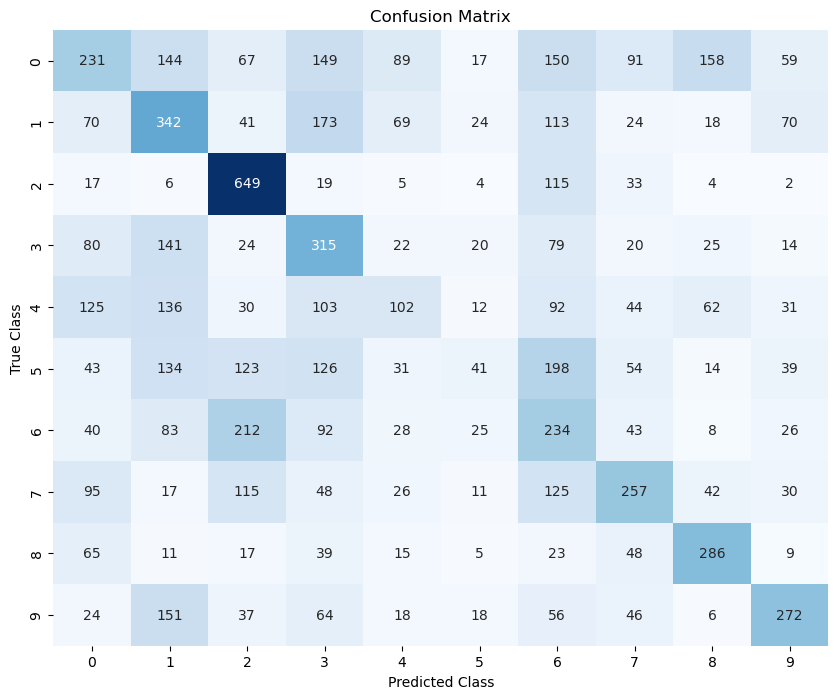

In [138]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [139]:
# testing the cross validation set:
logits = model(tensor_validation_X)
f_x = tf.nn.softmax(logits)

validation_predictions = tf.argmax(f_x, axis=1)

correct_predictions = tf.equal(validation_predictions, validation_vector_y)
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
print(correct_predictions)
print(accuracy)
print(validation_vector_y)

tf.Tensor([ True  True False ... False False False], shape=(2000,), dtype=bool)
tf.Tensor(0.301, shape=(), dtype=float32)
tf.Tensor([8 8 0 ... 6 6 6], shape=(2000,), dtype=int64)


In [140]:
conf_matrix = tf.math.confusion_matrix(labels=validation_vector_y, predictions=validation_predictions)
print(conf_matrix)

tf.Tensor(
[[ 83  36  19  77  25  10  51  20  56  28]
 [ 14  79   7  57  17  11  24   9   6  20]
 [  7   2 110   5   0   0  32   7   0   0]
 [ 20  26  10  66   6   2  29   5   5   7]
 [ 51  31   7  49  19   4  25  10  21  24]
 [ 11  26  34  45   4  22  43  17   1  10]
 [ 16  11  59  28   3   4  50  13   0   7]
 [ 16   1  18   2   3   1  11  45   6   2]
 [ 29   6   2  23   3   6  12   7  95   1]
 [  0   6   8   2   4   2   8  11   4  33]], shape=(10, 10), dtype=int32)


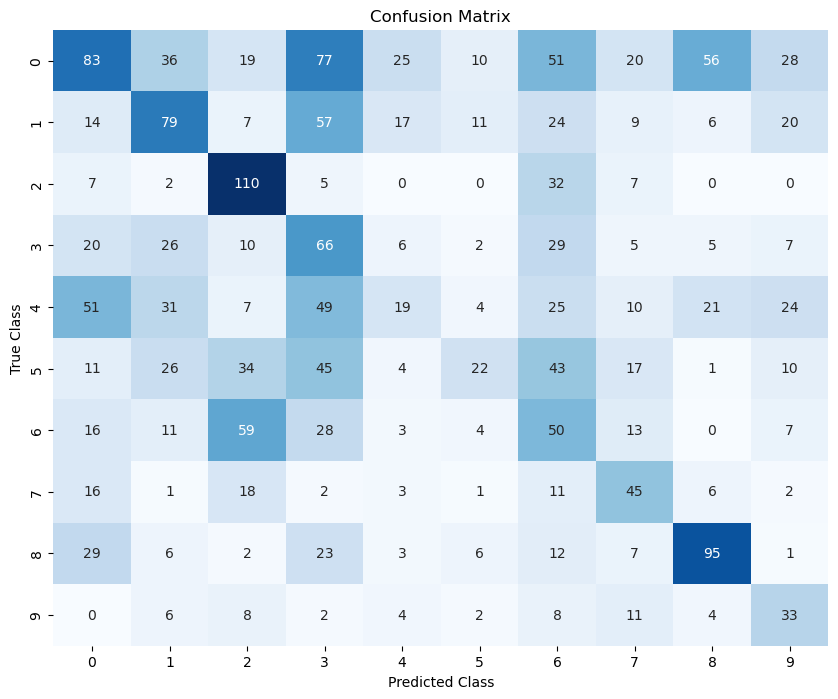

In [141]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()